In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.widgets import Slider, Button
import matplotlib.ticker as mtick
import math
from ipywidgets import interact

import numpy as np

x_range = [-0.5, 0.5]
y_range = [-0.5, 0.5]
x_ticks = 0.1
y_ticks = 0.05

percent = np.linspace(-0.5, 0.5, num=100)

def format_fig(
    name, fig, ax, y_array, percent_x_axis=True, percent_y_axis=True, axhline=True, axvline=True, y_ticks=y_ticks):
    perc_form = mtick.PercentFormatter(1.0, decimals=0)
    if percent_x_axis:
        ax.xaxis.set_major_formatter(perc_form)
    if percent_y_axis:
        ax.yaxis.set_major_formatter(perc_form)
    if axhline:
        ax.axhline(y=0, color='k')
    if axvline:
        ax.axvline(x=0, color='k')
    ax.grid()
    ax.set_title(f"{name} Payout Curve", fontsize=14)
    ax.set_xlabel('Price Change', fontsize=10)
    ax.set_ylabel('Portfolio Change', fontsize=10)
    ax.set_xticks(np.linspace(x_range[0], x_range[1], num=round((x_range[1] - x_range[0]) / x_ticks) + 1))
    y_min = math.floor(y_array.min() / y_ticks)* y_ticks
    y_max = math.ceil(y_array.max() / y_ticks)* y_ticks
    ax.set_yticks(np.linspace(y_min, y_max, num=round((y_max-y_min) / y_ticks) + 1))

def get_princ_perc(dl=0, bl=0, dx=0, bx=0, dy=0, by=0):
    principal = dl - bl + dx - bx + dy - by
    return ((dl - bl) * np.sqrt(1 + percent) + (dx - bx)  + (dy - by) * (1 + percent)) / principal - 1
    
def plot(name, percent, principal_percent, y_ticks=0.05): 
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    format_fig(name, fig, ax, principal_percent, y_ticks=y_ticks)
    ax.plot(percent, principal_percent)
    plt.show()


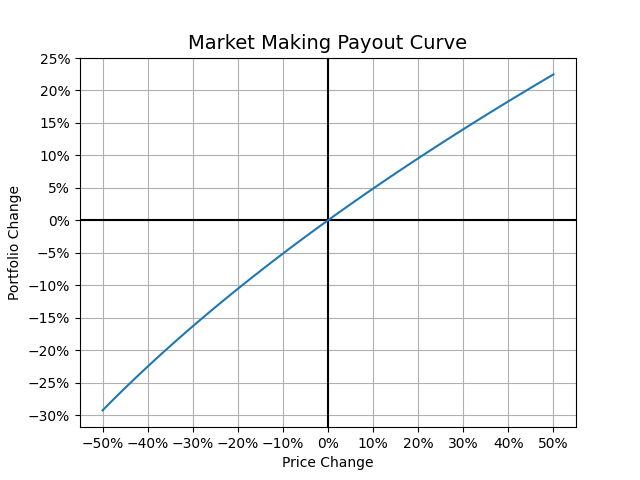

In [2]:
plot("Market Making", percent, get_princ_perc(dl=1))  

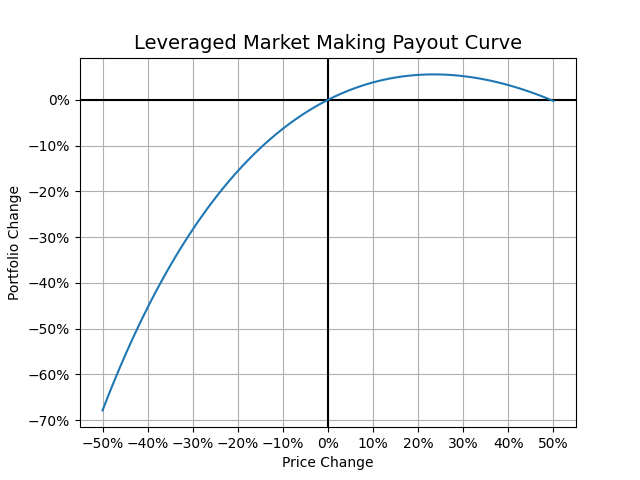

In [3]:
plot("Leveraged Market Making", percent, get_princ_perc(dl=10, bx=4.5, by=4.5), y_ticks=0.1)  

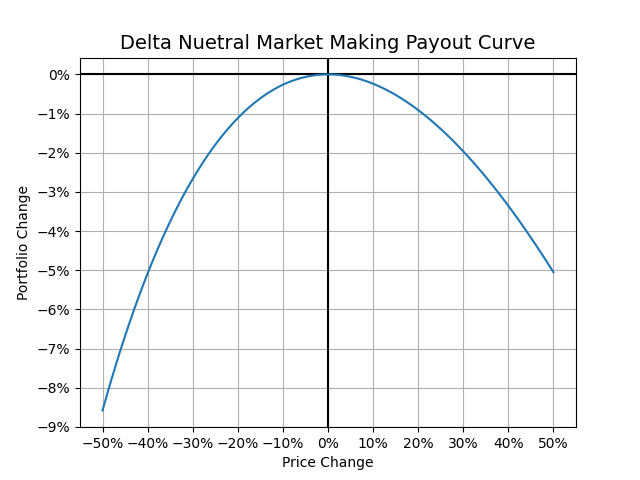

In [4]:
plot("Delta Nuetral Market Making", percent, get_princ_perc(dl=1, by=1/2), y_ticks=0.01)  

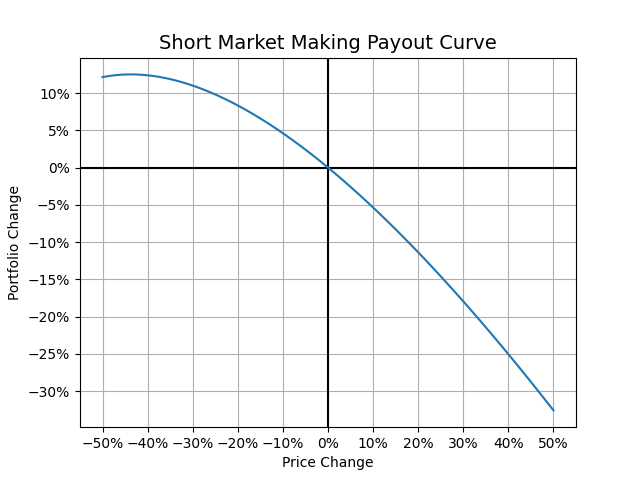

In [5]:
plot("Short Market Making", percent, get_princ_perc(dl=3, by=2))  

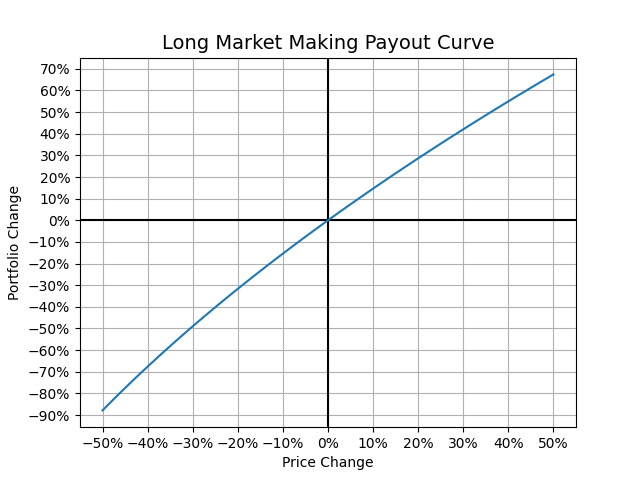

In [6]:
plot("Long Market Making", percent, get_princ_perc(dl=3, bx=2), y_ticks=0.1)  

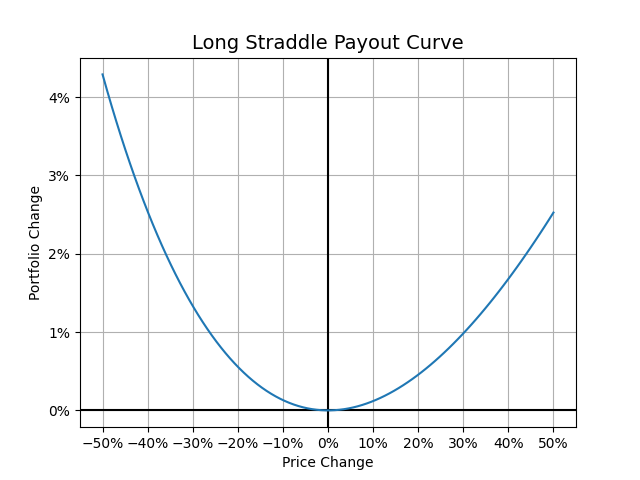

In [7]:
plot("Long Straddle", percent, get_princ_perc(bl=1, dx=1.5, dy=0.5), y_ticks=0.01)  

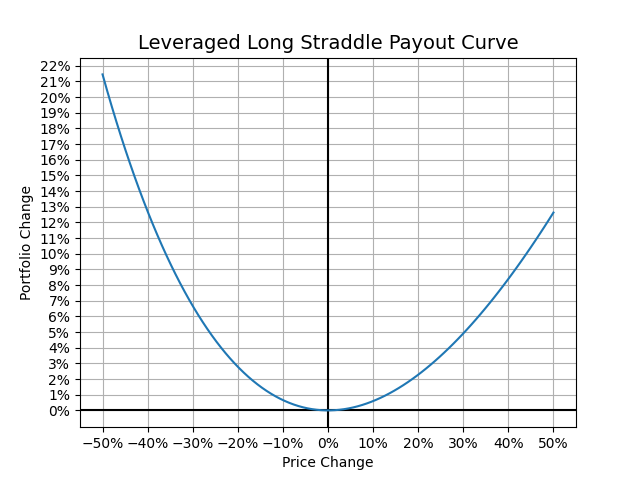

In [8]:
plot("Leveraged Long Straddle", percent, get_princ_perc(bl=5, dx=3.5, dy=2.5), y_ticks=0.01)  

In [9]:
from pandas import DataFrame as DF

In [10]:

def make_heat_df(percent, first_array, apy, days):
    data = {}
    apd = (apy + 1) ** (1/365) - 1
    
    data = {d: first_array + apd * d for d in range(days)}
    return DF(data=data, index=percent)

In [11]:
fa = get_princ_perc(dl=1, by=1/2)
hdf = make_heat_df(percent, fa, 0.35, 95)

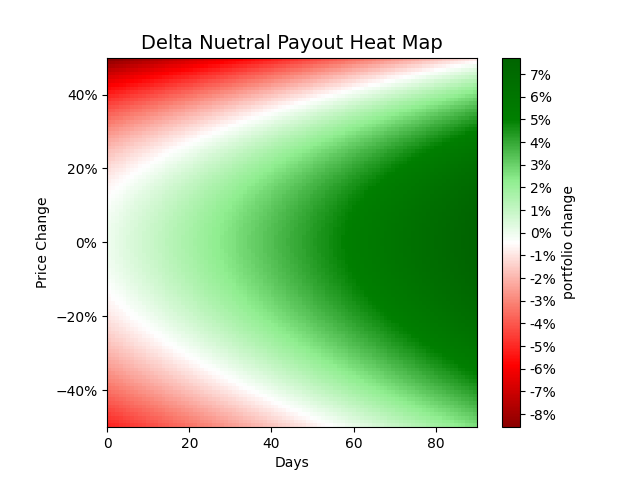

In [12]:

def plot_heat_map():
    fig, ax = plt.subplots()
    
    name = "Delta Nuetral Payout Heat Map"
    ax.set_title(name, fontsize=14)
    ax.set_xlabel('Days', fontsize=10)
    ax.set_ylabel('Price Change', fontsize=10)
    perc_form = mtick.PercentFormatter(1.0, decimals=0)
    ax.yaxis.set_major_formatter(perc_form)
    ext= 0, 90,  percent.min(), percent.max()
    cmap = mpl.colors.LinearSegmentedColormap.from_list('rg',['darkRed', "r", "salmon", "w", "lightgreen", "g", "darkgreen"], N=256) 
    im = ax.imshow(hdf, extent=ext, aspect=90, cmap=cmap, interpolation='nearest')
    cb = fig.colorbar(im, ax=ax, label="portfolio change")

    tick_space = 0.01
    max_change = math.ceil(hdf.to_numpy().max() / tick_space)
    min_change = math.ceil(hdf.to_numpy().min() / tick_space)
    ticks = [t * tick_space for t in range(min_change, max_change)]
    cb.set_ticks(ticks)
    cb.set_ticklabels(["{:.0%}".format(t) for t in ticks])
    
cb = plot_heat_map()